In [4]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

In [5]:
import sklearn.metrics

In [6]:
import math

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов)).


a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).



In [3]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [4]:
# Функция возвращает косинус угла между векторами a, b по их координатам

def cosine(a, b):
  
    # длины векторов
    aLength = np.linalg.norm(a)
    bLength = np.linalg.norm(b)
    
    return np.dot(a,b) / (aLength * bLength)

In [5]:
# Словарь пользователей и их оценок
d_stat = {}
for user, stats in enumerate(raitings,1):
    d_stat[user] = stats

In [50]:
# Словарь косинусного сходства каждого пользователя друг с другом
d1_stat = {}
for key, val in d_stat.items():
    i=1
    while i <= len(d_stat):
        if i != key:
            d1_stat[key, i] = cosine(val,d_stat[i])
        i=i+1
    
d1_stat   

{(1, 2): 0.8260291914926011,
 (1, 3): 0.8492152913329328,
 (1, 4): 0.7834011593236074,
 (1, 5): 0.8191763207928605,
 (1, 6): 0.7411854787309532,
 (1, 7): 0.7273582830552573,
 (1, 8): 0.8096752188740591,
 (1, 9): 0.9106598233573044,
 (1, 10): 0.8601077572660832,
 (2, 1): 0.8260291914926011,
 (2, 3): 0.8123432494307796,
 (2, 4): 0.8463533715492267,
 (2, 5): 0.8713805223930228,
 (2, 6): 0.8271310743150353,
 (2, 7): 0.8262968404756843,
 (2, 8): 0.8002600269984134,
 (2, 9): 0.8252630791081776,
 (2, 10): 0.8196812673341947,
 (3, 1): 0.8492152913329328,
 (3, 2): 0.8123432494307796,
 (3, 4): 0.8466937399285854,
 (3, 5): 0.7839429872916631,
 (3, 6): 0.7909798532223776,
 (3, 7): 0.6761622283340306,
 (3, 8): 0.7628955209443427,
 (3, 9): 0.8211207737697991,
 (3, 10): 0.9187305147356807,
 (4, 1): 0.7834011593236074,
 (4, 2): 0.8463533715492267,
 (4, 3): 0.8466937399285854,
 (4, 5): 0.6915340887233647,
 (4, 6): 0.7866579187986692,
 (4, 7): 0.832742107055763,
 (4, 8): 0.8293466659451719,
 (4, 9): 0.7

In [51]:
# Функция возвращает максимальное значение косинусного сходства для конкретного пользователя
def max_val(i):
    a = []
    for k, v in d1_stat.items():
        if k[0] == i:
            a.append(v)
    return max(a)
    a.clear()

In [52]:
for s in range(1,11):
    val_max = max_val(s)
    for key, val in d1_stat.items():
        if val == val_max and key[0] == s:
            print(f' На пользователя {key[0]} наиболее похож пользователь {key[1]}, косинусное сходство - {val}')
            
        

 На пользователя 1 наиболее похож пользователь 9, косинусное сходство - 0.9106598233573044
 На пользователя 2 наиболее похож пользователь 5, косинусное сходство - 0.8713805223930228
 На пользователя 3 наиболее похож пользователь 10, косинусное сходство - 0.9187305147356807
 На пользователя 4 наиболее похож пользователь 10, косинусное сходство - 0.8588686958710952
 На пользователя 5 наиболее похож пользователь 9, косинусное сходство - 0.8794847716076252
 На пользователя 6 наиболее похож пользователь 10, косинусное сходство - 0.8551490764118892
 На пользователя 7 наиболее похож пользователь 4, косинусное сходство - 0.832742107055763
 На пользователя 8 наиболее похож пользователь 6, косинусное сходство - 0.8445168512565341
 На пользователя 9 наиболее похож пользователь 1, косинусное сходство - 0.9106598233573044
 На пользователя 10 наиболее похож пользователь 3, косинусное сходство - 0.9187305147356807



b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?
#### Возможно использовать функцию понижения размерности:

In [59]:
from sklearn.decomposition import TruncatedSVD

In [62]:
def TruncClassifier(X, n_components=5):
    svd = TruncatedSVD(n_components = n_components)
    X_reduced = svd.fit_transform(X)
    return X_reduced, svd 

TruncClassifier(raitings, n_components=5)

(array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
        [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
        [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
        [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
        [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
        [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
        [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
        [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
        [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
        [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]]),
 TruncatedSVD(n_components=5))

### Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [63]:
from scipy.misc import derivative

def f(x):
    return math.tan(math.sin(x) + math.cos(2*x+3))**2
derivative(f, 1.0, dx=1e-6)

55.3859176464222

In [64]:
x = 1

In [67]:
2*(1 + math.tan(math.sin(x) + math.cos(2*x + 3))**2)*(-2*math.sin(2*x + 3) + math.cos(x))*math.tan(math.sin(x) + math.cos(2*x + 3))

55.385917635337854

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [12]:
from scipy.optimize import differential_evolution

In [2]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [7]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [8]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

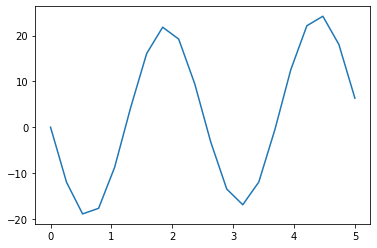

In [9]:
plt.plot(x, fx)
plt.show()

In [10]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [22]:
bounds = [(-25,25), (-25,25)]

In [28]:
from scipy.optimize import differential_evolution


result = differential_evolution(error, bounds, seed=42)

print(f'Параметры a, b = {result.x}')

Параметры a, b = [ 3.  -2.5]


### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

(array([0.01132075, 0.05283019, 0.16226415, 0.38490566, 0.52075472,
        0.37358491, 0.26037736, 0.09433962, 0.01698113, 0.00943396]),
 array([ 7.  ,  7.53,  8.06,  8.59,  9.12,  9.65, 10.18, 10.71, 11.24,
        11.77, 12.3 ]),
 <BarContainer object of 10 artists>)

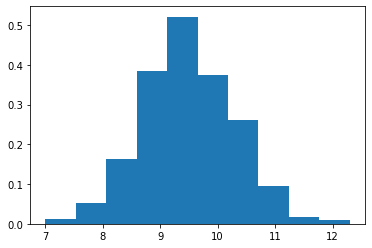

In [34]:
sp = range(20)
data = [np.mean([np.random.choice(sp) for i in range(50)]) for j in range(1000)]
plt.hist(data, density=True)


In [33]:
data

[9.44,
 8.4,
 9.42,
 10.84,
 9.7,
 8.86,
 9.86,
 10.04,
 8.6,
 10.2,
 9.04,
 9.16,
 9.98,
 7.46,
 8.34,
 8.96,
 8.64,
 8.64,
 11.18,
 8.8,
 10.42,
 9.8,
 8.48,
 10.58,
 7.86,
 9.1,
 11.52,
 8.6,
 9.4,
 9.34,
 8.9,
 9.98,
 9.78,
 10.92,
 9.88,
 7.74,
 10.4,
 9.64,
 8.14,
 9.4,
 9.66,
 10.22,
 11.0,
 7.98,
 8.64,
 9.52,
 11.1,
 10.9,
 8.6,
 10.22,
 8.24,
 8.1,
 8.56,
 9.54,
 9.18,
 9.08,
 11.34,
 9.66,
 10.6,
 9.1,
 9.6,
 10.02,
 8.82,
 9.44,
 9.56,
 9.84,
 9.8,
 9.86,
 9.08,
 10.08,
 7.98,
 8.98,
 10.5,
 10.18,
 9.42,
 9.62,
 10.5,
 8.56,
 8.84,
 9.94,
 9.58,
 11.44,
 10.96,
 10.56,
 10.62,
 9.04,
 9.46,
 9.92,
 10.1,
 9.7,
 10.22,
 9.86,
 9.78,
 10.3,
 9.64,
 9.36,
 9.68,
 9.54,
 10.22,
 9.52,
 9.58,
 9.66,
 10.24,
 10.3,
 10.4,
 10.06,
 10.06,
 9.84,
 9.34,
 10.0,
 8.96,
 10.2,
 9.18,
 8.84,
 9.72,
 9.6,
 9.64,
 10.18,
 9.82,
 9.14,
 10.14,
 8.52,
 9.56,
 8.7,
 9.02,
 9.54,
 9.06,
 8.98,
 8.9,
 9.24,
 9.9,
 8.8,
 8.56,
 9.86,
 8.92,
 9.48,
 9.58,
 8.38,
 8.88,
 9.66,
 10.06,
 9.96,
 8

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)


In [35]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [37]:
from numpy import linalg

In [42]:
w,v = linalg.eig(m)

f'Собственные числа матрицы - {w}, cобственные векторы матрицы - {v} '



'Собственные числа матрицы - [ 3. -1.], cобственные векторы матрицы - [[ 0.89442719 -0.89442719]\n [ 0.4472136   0.4472136 ]] '

In [55]:
for i in range(len(w)):
    print(f'Собственное значение {round(w[i])}, соответствующий ему собственный вектор: {v[:,i]}')


Собственное значение 3, соответствующий ему собственный вектор: [0.89442719 0.4472136 ]
Собственное значение -1, соответствующий ему собственный вектор: [-0.89442719  0.4472136 ]


Собственные значения
- $λ^2-2λ-3=0$
- $D = (-2)^2 - 4 * 1 * (-3) = 16$
- Корни данного уровнения и являются собственными числами матрицы:
    - $λ1 = (2 + 4)/2 = 3$
    - $λ2 = (2 + -)/2 = -1$

- Для обпределения собственного вектора для собственного числа $ λ= -1$ необходимо решить систему уравнений 
    * $(1+1)*X1 + 4 * X2 = 0$
    * $X1 + (1+1)*X2 = 0$

- Для обпределения собственного вектора для собственного числа $ λ= 3$ необходимо решить систему уравнений 
    * $(1-3)*X1 + 4 * X2 = 0$
    * $X1 + (1-3)*X2 = 0$